# Assemble Garcia & Keeling 2001 O$_2$ flux product

In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
import os
from datetime import datetime
import yaml

import numpy as np
import xarray as xr

from netCDF4 import default_fillvals

import matplotlib.pyplot as plt

import intake

import pop_tools

import config
import fgo2_gk2001
import regrid_tools
import util

### Generate datasets

### Shifting and scaling
The recommended Garcia and Keeling rescaling is 0.82 
(Naegler 2006 vs. Wanninkhof 1992 scaling factors 0.32/0.39), plus a 10-day shift later, to allow for mixed layer equilibration.

In [30]:
shift_time = 0.
scaleby = 0.82

ds = fgo2_gk2001.open_flux_dataset(scaleby=scaleby, clobber=True)
ds

<xarray.Dataset>
Dimensions:       (time: 12, lat: 160, lon: 320)
Coordinates:
  * time          (time) float64 15.5 45.0 74.5 105.0 ... 288.5 319.0 349.5
  * lat           (lat) float64 -89.44 -88.31 -87.19 ... 87.19 88.31 89.44
  * lon           (lon) float64 -179.4 -178.3 -177.2 ... 177.2 178.3 179.4
Data variables:
    area          (lat, lon) float64 1.536e+08 1.536e+08 ... 1.536e+08 1.536e+08
    date          (time) float64 2e+07 2e+07 2e+07 2e+07 ... 2e+07 2e+07 2e+07
    fgo2_ann      (time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    fgo2_sea      (time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    fgo2_thm_ann  (time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    fgo2_thm_sea  (time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    fgo2_bio_ann  (time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    fgo2_bio_sea  (time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    mask          (lat, lon) int32 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1

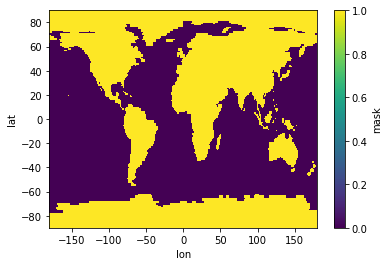

In [31]:
ds.mask.plot()

In [32]:
time, time_bnds = util.gen_midmonth_cftime_coord((2009, 2009), shift_time=shift_time, climatology_year_end=2009)
date = util.gen_date_variable(time)
time

<xarray.DataArray 'time' (time: 12)>
array([cftime.DatetimeGregorian(2009, 1, 16, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 2, 15, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 3, 16, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 4, 16, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 5, 16, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 6, 16, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 7, 16, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 8, 16, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 9, 16, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 10, 16, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 11, 16, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 12, 16, 12, 0, 0, 0, has_year_zero=False)],
      dtype=object)
Dimensions without coordinates: time
Attributes:
    shift_time:   0.0
    climatology:  climatology_bounds

In [33]:
time

<xarray.DataArray 'time' (time: 12)>
array([cftime.DatetimeGregorian(2009, 1, 16, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 2, 15, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 3, 16, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 4, 16, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 5, 16, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 6, 16, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 7, 16, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 8, 16, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 9, 16, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 10, 16, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 11, 16, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 12, 16, 12, 0, 0, 0, has_year_zero=False)],
      dtype=object)
Dimensions without coordinates: time
Attributes:
    shift_time:   0.0
    climatology:  climatology_bounds

In [34]:
ds['time'] = time
ds[time.climatology] = time_bnds
ds['date'] = date
ds

<xarray.Dataset>
Dimensions:             (time: 12, lat: 160, lon: 320, d2: 2)
Coordinates:
  * time                (time) object 2009-01-16 12:00:00 ... 2009-12-16 12:0...
  * lat                 (lat) float64 -89.44 -88.31 -87.19 ... 87.19 88.31 89.44
  * lon                 (lon) float64 -179.4 -178.3 -177.2 ... 177.2 178.3 179.4
Dimensions without coordinates: d2
Data variables:
    area                (lat, lon) float64 1.536e+08 1.536e+08 ... 1.536e+08
    date                (time) int64 20090116 20090215 ... 20091116 20091216
    fgo2_ann            (time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    fgo2_sea            (time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    fgo2_thm_ann        (time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    fgo2_thm_sea        (time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    fgo2_bio_ann        (time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    fgo2_bio_sea        (time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    mask                (lat, lon) int32 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    climatology_bounds  (time, d2) object 2009-01-01 00:00:00 ... 2009-01-01 ...

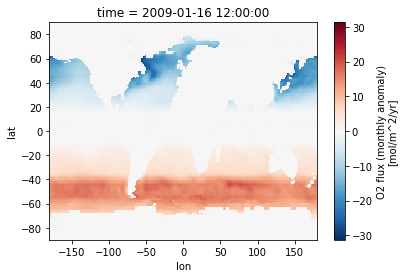

In [35]:
ds.fgo2_sea.isel(time=0).plot()

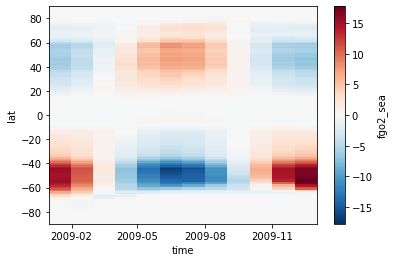

In [36]:
ds.fgo2_sea.mean("lon").T.plot()

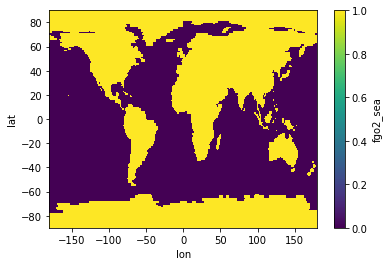

In [37]:
gk_missing = (ds.fgo2_sea == 0.).all(dim='time')
gk_missing.plot()

# Read annual-mean inversion fluxes

Global sum Gruber: -0.1000 Tmol/yr
Global sum reconstructed: -0.1000 Tmol/yr

Global area: 34.837465
Global sum Resplandy: 0.8800 Tmol/yr
Global sum reconstructed: 0.8800 Tmol/yr

Global area: 34.551892


<xarray.DataArray 'fgo2' (lat: 160, lon: 320)>
array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.95947659, 0.95947659, 0.95947659, ..., 0.95947659, 0.95947659,
        0.95947659],
       [0.95947659, 0.95947659, 0.95947659, ..., 0.95947659, 0.95947659,
        0.95947659],
       [0.95947659, 0.95947659, 0.95947659, ..., 0.95947659, 0.95947659,
        0.95947659]])
Coordinates:
  * lat      (lat) float64 -89.44 -88.31 -87.19 -86.06 ... 87.19 88.31 89.44
  * lon      (lon) float64 -179.4 -178.3 -177.2 -176.1 ... 177.2 178.3 179.4
Attributes:
    long_name:  Annual mean O2 flux (Resplandy et al. (2016))
    units:      mol/m^2/yr

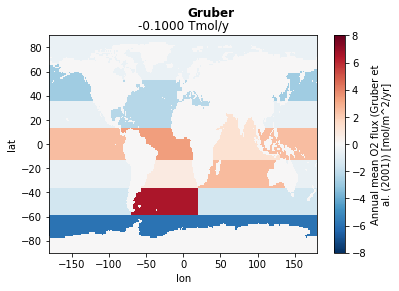

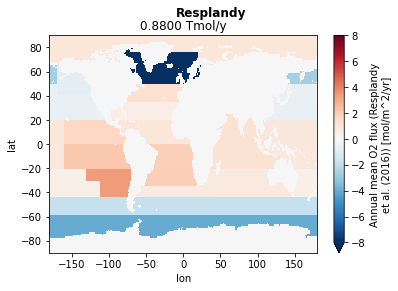

In [38]:
dsets_ann = {}

x, y = np.meshgrid(ds.lon, ds.lat)

for product in ["Gruber", "Resplandy"]:
    ds_ann = fgo2_gk2001.open_inversion_annual_flux(product, gk_grid=True)
       
    glb_sum = (ds_ann.fgo2 * ds_ann.area).sum() * 1e-12
    print(f'Global sum reconstructed: {glb_sum.values:0.4f} Tmol/yr\n')
    
    # visualize
    fig = plt.figure()        
    ds_ann.fgo2.plot(vmin=-8., vmax=8., cmap='RdBu_r')
    plt.title(f"{glb_sum.values:0.4f} Tmol/y")
    fig.suptitle(product, fontweight="bold")    
    
    dsets_ann[product] = ds_ann 
    print(f'Global area: {ds_ann.area.where(ds_ann.fgo2 != 0).fillna(0).sum().values * 1e-13:03f}')
ds_ann.fgo2  

Note that the GK fluxes omit data in some regions. 

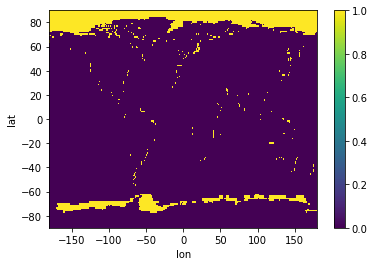

In [39]:
ann_missing = (dsets_ann['Resplandy'].fgo2 == 0.)
(gk_missing & ~ann_missing).plot()

And there are some points where GK has data, but the mask used for the annual inversions does not have data.

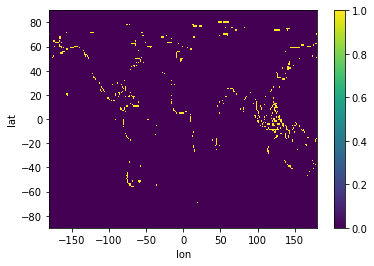

In [40]:
(~gk_missing & ann_missing).plot()

## Apply annual mean fluxes from Gruber et al. 2001 & Resplandy et al. 2016 and regrid

In [41]:
src_grid = regrid_tools.grid("latlon", nx=ds.lon.size, ny=ds.lat.size, lon0=-180.)
src_grid

exists: /glade/scratch/mclong/tmp/regridding/latlon_1.125x1.125_lon0=-180.0.nc


grid: latlon_latlon_1.125x1.125_lon0=-180.0
dims: (160, 320)
file: /glade/scratch/mclong/tmp/regridding/latlon_1.125x1.125_lon0=-180.0.nc

In [42]:
dst_grid = regrid_tools.grid("latlon", **config.config_dict["flux-dst-grid-kwargs"])
dst_grid

exists: /glade/scratch/mclong/tmp/regridding/latlon_1.0x1.0_lon0=-180.0.nc


grid: latlon_latlon_1.0x1.0_lon0=-180.0
dims: (180, 360)
file: /glade/scratch/mclong/tmp/regridding/latlon_1.0x1.0_lon0=-180.0.nc

In [43]:
dst_grid_ds = util.generate_latlon_grid(**config.config_dict["flux-dst-grid-kwargs"])[["area"]]
dst_grid_ds

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    area     (lat, lon) float64 1.079e+08 1.079e+08 ... 1.079e+08 1.079e+08

In [44]:
regrid_obj = regrid_tools.regridder(src_grid, dst_grid, method="conserve")
regrid_obj

source grid dims: (160, 320)
destination grid dims: (180, 360)


regridder latlon_1.125x1.125_lon0=-180.0.nc --> latlon_1.0x1.0_lon0=-180.0.nc

In [45]:
time_wgt  = np.array([31., 28., 31., 30., 31., 30., 31., 31., 30., 31., 30., 31.]) / 365.
np.testing.assert_allclose(time_wgt.sum(), 1.0)

In [46]:
dirout = config.flux_product_dir
clobber = True
file_out = {}
dsets = {}
for product in ["Gruber", "Resplandy"]:

    # compute fgo2 with GK seasonal component and annual mean from inversion
    dso_src = ds[["fgo2_sea", "fgo2_thm_sea", "fgo2_bio_sea"]]   
    dso_src["fgo2"] = xr.full_like(ds.fgo2_sea, fill_value=0.)    
    dso_src.fgo2.values = ds.fgo2_sea + dsets_ann[product].fgo2
    
    dso_src.fgo2.attrs["long_name"] = f"GK01 O$_2$ seasonal flux w/ {product} ann mean"
    dso_src.fgo2.encoding["_FillValue"] =  default_fillvals["f8"]

    # assert that the total flux minus the seasonal flux is equal to the annual mean flux
    np.testing.assert_allclose(
        (dso_src.fgo2 - dso_src.fgo2_sea).isel(time=0).fillna(0.), 
        dsets_ann[product].fgo2.fillna(0.)
    )
    
    glb_sum = (time_wgt * (dso_src.fgo2 * ds.area).sum(['lat', 'lon'])).sum('time') * 1e-12
    print(f'Global sum src grid: {glb_sum.values:0.4f} Tmol/yr')
   
    glb_sum = (dsets_ann[product].fgo2 * ds.area).sum(['lat', 'lon']) * 1e-12
    print(f'Expected global sum src grid: {glb_sum.values:0.4f} Tmol/yr')
    
    # perform regridding 
    dso = dst_grid_ds.copy()
    dso_dst_data = regrid_obj(dso_src, renormalize=True, apply_mask=False)
    for v in dso_dst_data.data_vars:
        dso[v] = dso_dst_data[v]
    
    glb_sum = (time_wgt * (dso.fgo2 * dso.area).sum(['lat', 'lon'])).sum('time') * 1e-12
    print(f'Global sum dst grid: {glb_sum.values:0.4f} Tmol/yr')
    
    # add clim_bounds
    dso["climatology_bounds"] = ds.climatology_bounds    
    
    # write output
    file_out[product] = f"{dirout}/fgo2.garcia-keeling.monclim.shft_{shift_time:0.0f}d.scale_{scaleby}.{product.lower()}_ann.nc"        
    if clobber and os.path.exists(file_out[product]):
        os.remove(file_out[product])
    
    if not os.path.exists(file_out[product]):
        print(f"writing {file_out[product]}")
        util.to_netcdf_clean(dso, file_out[product])

Global sum src grid: -0.1000 Tmol/yr
Expected global sum src grid: -0.1000 Tmol/yr
Global sum dst grid: -0.0972 Tmol/yr
writing /glade/work/mclong/sno-analysis/flux-products/fgo2.garcia-keeling.monclim.shft_0d.scale_0.82.gruber_ann.nc
------------------------------
Writing /glade/work/mclong/sno-analysis/flux-products/fgo2.garcia-keeling.monclim.shft_0d.scale_0.82.gruber_ann.nc
netcdf fgo2.garcia-keeling.monclim.shft_0d.scale_0.82.gruber_ann {
dimensions:
	lat = 180 ;
	lon = 360 ;
	time = 12 ;
	d2 = 2 ;
variables:
	double lat(lat) ;
	double lon(lon) ;
	float area(lat, lon) ;
		area:_FillValue = 9.96921e+36f ;
		area:units = "m^2" ;
		area:long_name = "area" ;
	double time(time) ;
		time:shift_time = 0. ;
		time:climatology = "climatology_bounds" ;
		time:units = "days since 2009-01-01" ;
		time:calendar = "gregorian" ;
	float fgo2_sea(time, lat, lon) ;
		fgo2_sea:_FillValue = 9.96921e+36f ;
		fgo2_sea:long_name = "O2 flux (monthly anomaly)" ;
		fgo2_sea:units = "mol/m^2/yr" ;
		fgo2_se

## Make catalog entry

In [47]:
curator = util.curate_flux_products()
curator

{'description': 'Flux products for transport modeling', 'plugins': {'source': [{'module': 'intake_xarray'}]}, 'sources': {'fgapo.carboscope.apo99_v2020': {'args': {'urlpath': '/glade/work/mclong/sno-analysis/flux-products/fgapo_ocn.CarboScope.apo99_v2020.nc', 'xarray_kwargs': {'decode_times': False}}, 'description': 'APO fluxes from CarboScope inversion apo99_v2020', 'driver': 'netcdf'}, 'fgco2.MPI-SOM-FFN': {'args': {'urlpath': '/glade/work/mclong/sno-analysis/flux-products/fgco2.MPI-SOM-FFN.v2018.monclim_2009-2018.nc', 'xarray_kwargs': {'decode_times': False}}, 'description': 'An observation-based global monthly gridded sea surface pCO2 product from 1982 onward and its monthly climatology. Citation: Landschützer, P., Gruber, N., Bakker, D. C. E.: Decadal variations and trends of the global ocean carbon sink, Global Biogeochemical Cycles, 30, doi:10.1002/2015GB005359, 2016', 'driver': 'netcdf'}}}

In [48]:
select_product = 'Resplandy'
curator.add_source(
    key=f"fgo2.gk2001_{select_product}",
    urlpath=file_out[select_product],
    description=f"GK2001 seasional fluxes with {select_product} annual mean; time axis shifted by {shift_time}d, fluxes scaled by {scaleby}",
)

### Test intake catalog

In [49]:
cat = curator.open_catalog()
cat

flux_products-catalog-local:
  args:
    path: catalogs/flux_products-catalog-local.yml
  description: Flux products for transport modeling
  driver: intake.catalog.local.YAMLFileCatalog
  metadata: {}


In [50]:
cat._entries.keys()

dict_keys(['fgapo.carboscope.apo99_v2020', 'fgco2.MPI-SOM-FFN', 'fgo2.gk2001_Resplandy'])

In [51]:
key = f"fgo2_gk2001_{select_product}"
dsi = cat[key].to_dask().compute()

region = xr.DataArray(['NET', 'SET'], dims=('region'), name='region')

masked_area = xr.concat([
    dsi.area.where((dsi.lat >= 20)),
    dsi.area.where((dsi.lat <= -20)),    
],
    dim=region,
)

reg_sum = {}
ds_glb = {}
for product in [f"fgo2_gk2001_{select_product}"]:
    ds_ann = fgo2_gk2001.open_inversion_annual_flux(product.split('_')[-1], gk_grid=True)
    
    reg_sum[product] = xr.concat([
        (ds_ann.fgo2 * ds_ann.area.where(ds_ann.lat >= 20)).sum() / 1e12,
        (ds_ann.fgo2 * ds_ann.area.where(ds_ann.lat <= -20)).sum() / 1e12,
    ],
        dim=region,
    )
    
    ds_glb[product] = (ds_ann.fgo2 * ds_ann.area).sum().values / 1e12

masked_area.isel(region=0).plot()
ds_glb

KeyError: 'fgo2_gk2001_Resplandy'

In [ ]:
f, axs = plt.subplots(2, 1, figsize=(6, 8))

for key in [f"fgo2_gk2001_{select_product}"]:
    print(key)
    dsi = cat[key].to_dask().compute()
    
    print(f'GLB Ann inversion: {ds_glb[key]:0.4f} Tmol/yr')
    
    global_sum = (time_wgt * (dsi.fgo2 * dsi.area).sum(['lat', 'lon'])).sum('time').values * 1e-12               
    print(f'GLB GK season+ann: {global_sum} Tmol/yr')
        
    dsi_region = (dsi[['fgo2', 'fgo2_sea']] * masked_area).sum(['lat', 'lon']) * 1e-12
    for v in ['fgo2', 'fgo2_sea']:
        dsi_region[v].attrs['units'] = 'Tmol yr$^{-1}$'
    dsi_region.fgo2.attrs['long_name'] = 'O$_2$ flux (total)'
    dsi_region.fgo2_sea.attrs['long_name'] = 'O$_2$ flux (seasonal)'
    
    for i in range(2):   
        print(f'{dsi_region.region[i].values} Ann inversion: {reg_sum[key].isel(region=i).values:0.4f} Tmol/yr')
        dsi_region.isel(region=i).fgo2.plot(ax=axs[i], label=key)
    
        regional_sum = (time_wgt * dsi_region.fgo2.isel(region=i, drop=True)).sum('time').values
        print(f'{dsi_region.region[i].values} GK season+ann: {regional_sum} Tmol/yr')        
    print()
    
axs[0].set_xticklabels([])
for ax in axs:
    ax.legend();
    

In [ ]:
dsi.fgo2.sel(lat=-60., lon=150., method='nearest').plot(marker='o')